# Month 02 (Mini-project) Models

#### Install the required Libraries if not already satisfied

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy tensorflow

Note: you may need to restart the kernel to use updated packages.


### Import required libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import tensorflow as tf
from tensorflow.keras import layers, models

### Load the dataset

In [13]:
df = pd.read_csv('housing.csv')

In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [16]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Data Cleaning

In [22]:
df = pd.get_dummies(df, drop_first=True)

#### Check for missing values

In [23]:
df.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

#### Handling missing values

In [46]:
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [47]:
df_imputed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0,0.0,0.0,0.0


In [49]:
df_imputed.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

### Exploratory Data Analysis (EDA)

#### Plot distributions

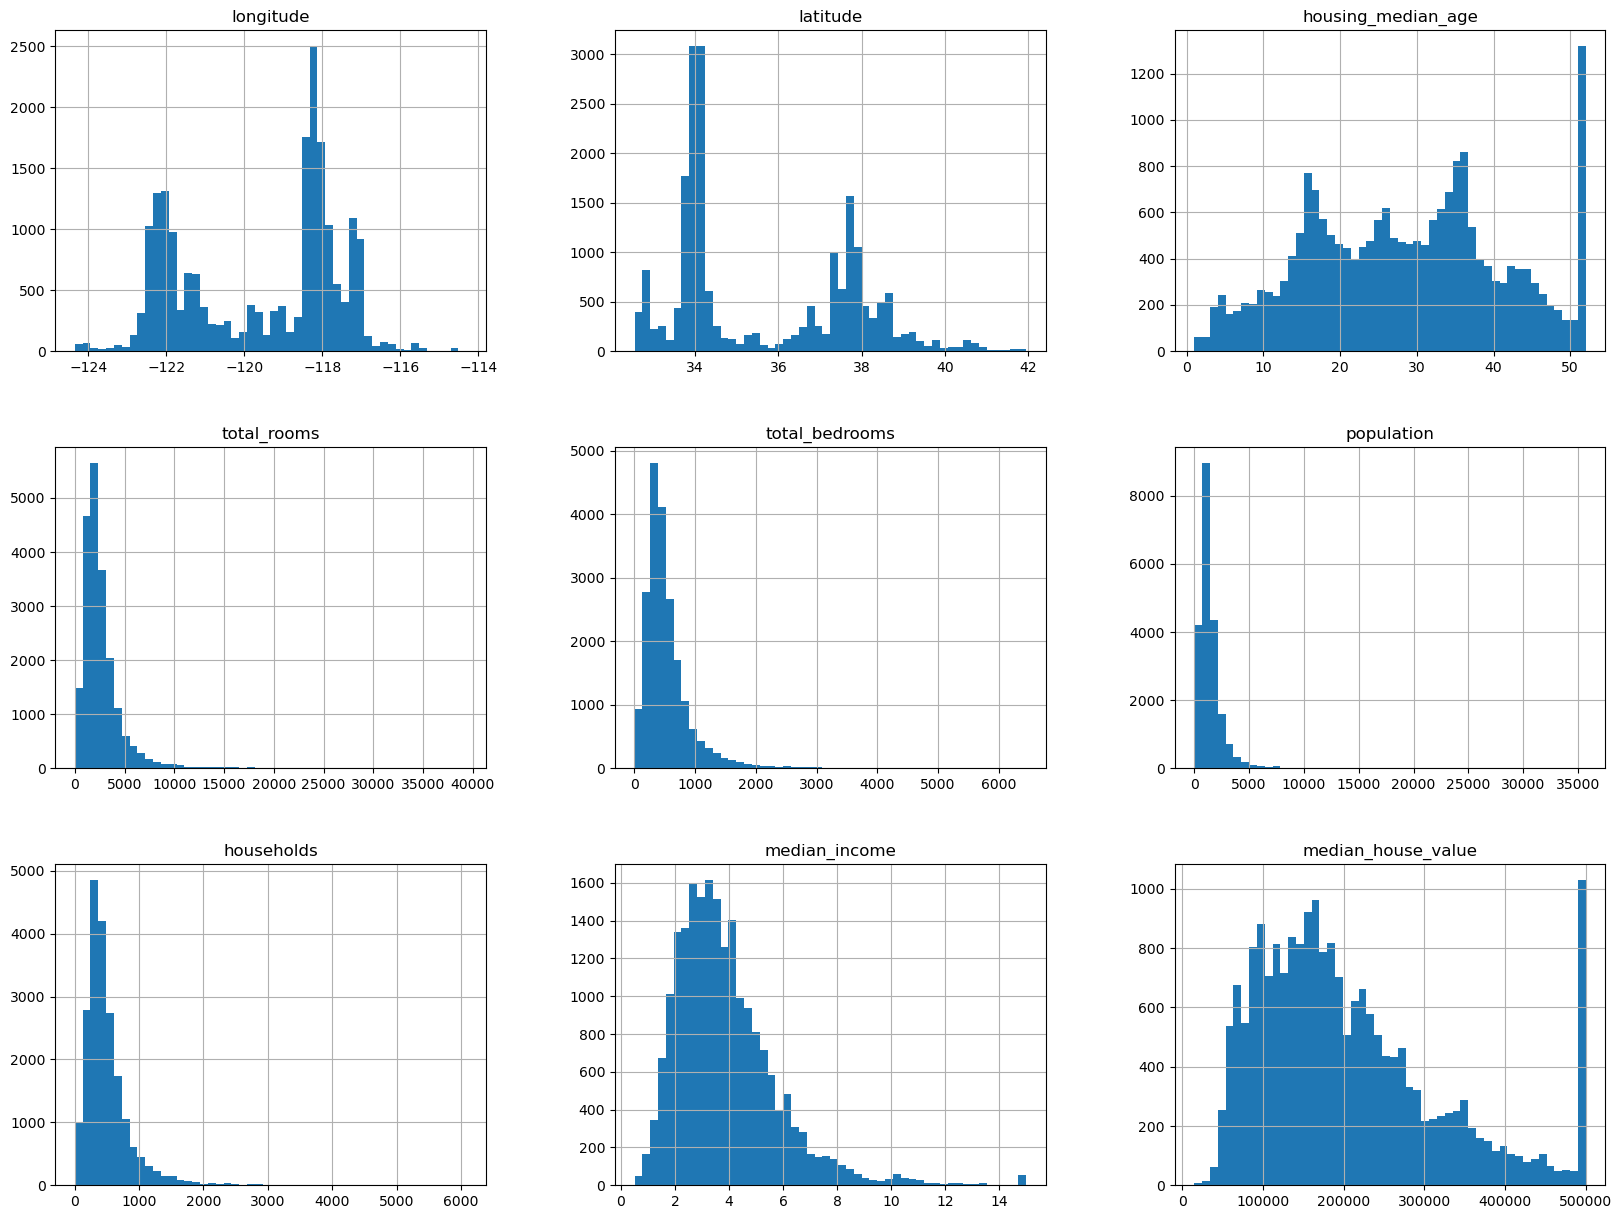

In [50]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Correlation matrix

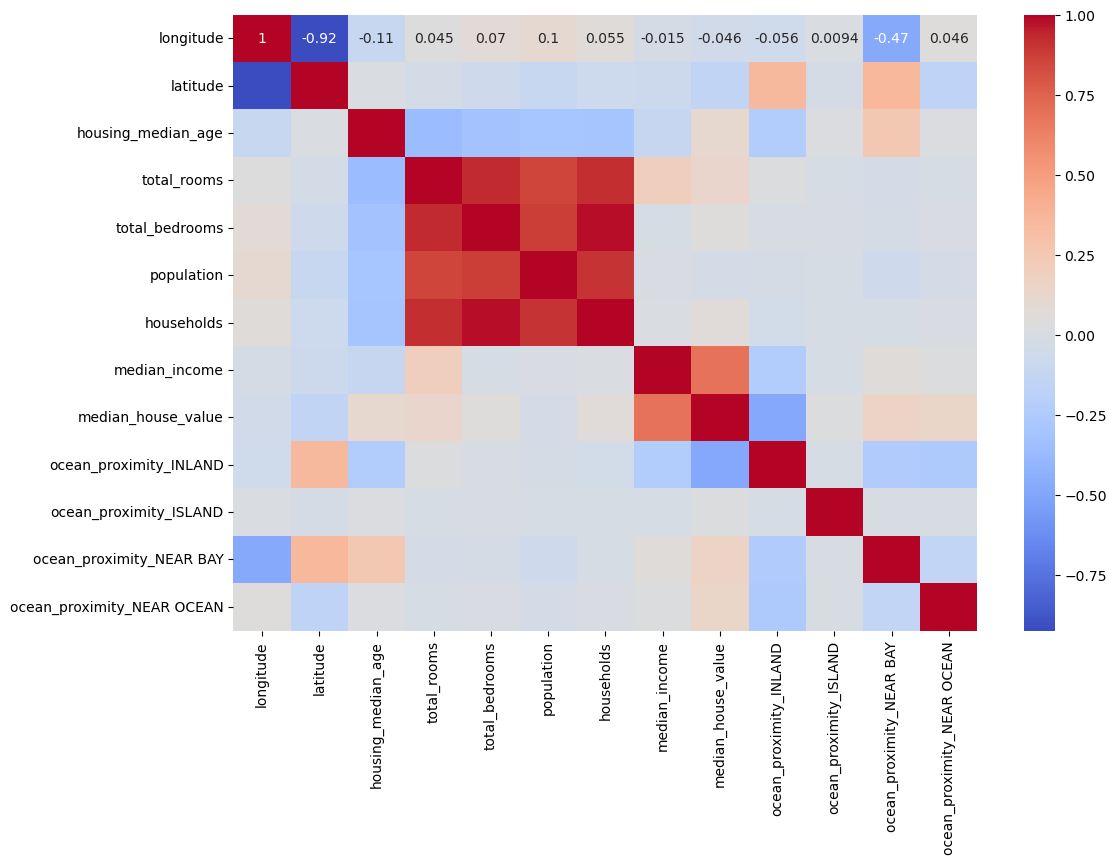

In [51]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Pairplot

C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Fahan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

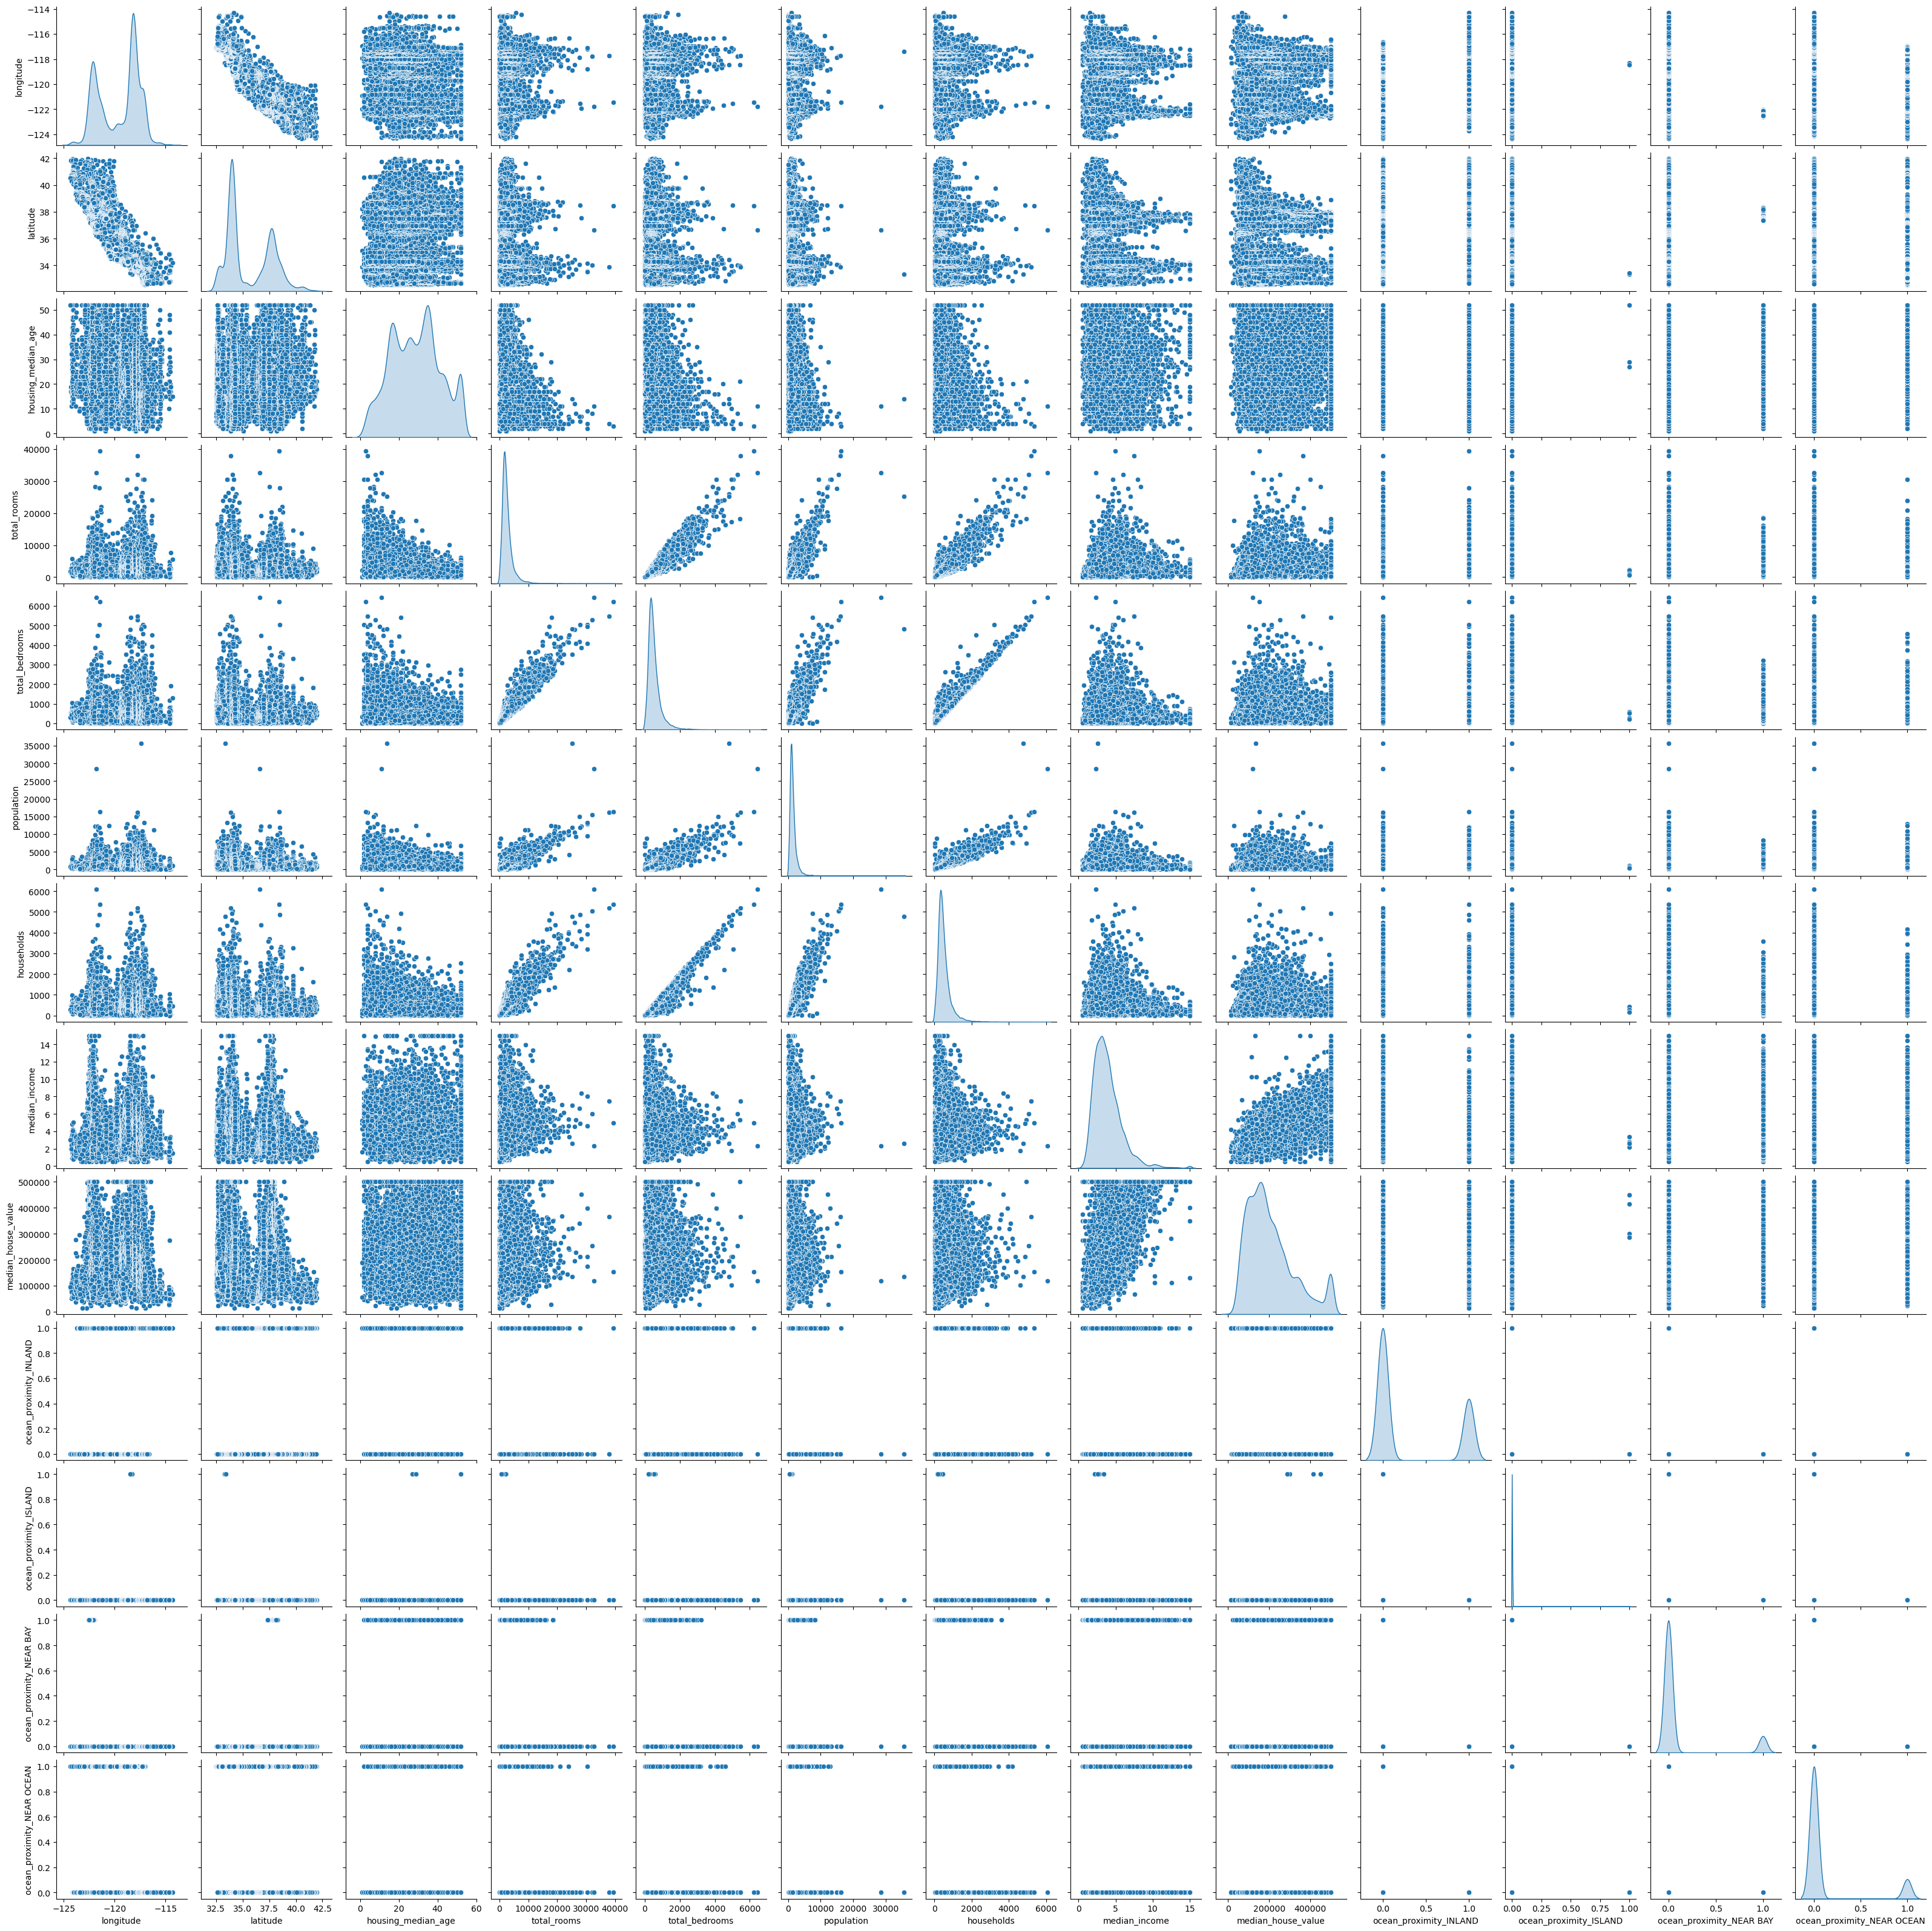

In [52]:
sns.pairplot(df, diag_kind="kde")
plt.show()

### Data Transformation

#### Split data into features and target

In [53]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [54]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,True,False,False,False
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,True,False,False,False
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,True,False,False,False
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,True,False,False,False


In [55]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

#### Standardization of numerical features

In [56]:
num_features = X.columns

In [59]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [60]:
X_prepared = num_pipeline.fit_transform(X)

### Statistical Tests

#### Pearson correlation

In [66]:
for col in X.columns:
    try:
        corr, _ = pearsonr(X[col], y)
        print(f'{col} and target: {corr:.2f}')
    except ValueError as e:
        print(f"Could not compute Pearson correlation for {col} due to error: {e}")

longitude and target: -0.05
latitude and target: -0.14
housing_median_age and target: 0.11
total_rooms and target: 0.13
Could not compute Pearson correlation for total_bedrooms due to error: array must not contain infs or NaNs
population and target: -0.02
households and target: 0.07
median_income and target: 0.69
ocean_proximity_INLAND and target: -0.48
ocean_proximity_ISLAND and target: 0.02
ocean_proximity_NEAR BAY and target: 0.16
ocean_proximity_NEAR OCEAN and target: 0.14


#### Spearman correlation

In [71]:
for col in X.columns:
    try:
        corr, _ = spearmanr(X[col], y)
        print(f'{col} and target: {corr:.2f}')
    except ValueError as e:
        print(f"Could not compute Spearman correlation for {col} due to error: {e}")

longitude and target: -0.07
latitude and target: -0.17
housing_median_age and target: 0.07
total_rooms and target: 0.21
total_bedrooms and target: nan
population and target: 0.00
households and target: 0.11
median_income and target: 0.68
ocean_proximity_INLAND and target: -0.57
ocean_proximity_ISLAND and target: 0.02
ocean_proximity_NEAR BAY and target: 0.16
ocean_proximity_NEAR OCEAN and target: 0.14


### Model Preparation

#### Train-test split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

### Baseline Regressors

In [83]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}')
    return model

### Linear Regression

In [85]:
lr_model = evaluate_model(LinearRegression())

MAE: 50670.74, MSE: 4908476721.16, RMSE: 70060.52, R2: 0.63


### Support Vector Machine Regression

In [86]:
svm_model = evaluate_model(SVR())

MAE: 86961.28, MSE: 13655934685.61, RMSE: 116858.61, R2: -0.04


### Decision Tree Regression

In [89]:
dt_model = evaluate_model(DecisionTreeRegressor())

MAE: 43866.39, MSE: 4833604773.15, RMSE: 69524.13, R2: 0.63


### Random Forest Regression

In [93]:
rf_model = evaluate_model(RandomForestRegressor())

MAE: 31686.05, MSE: 2403831058.66, RMSE: 49028.88, R2: 0.82


### Gradient Boosting Regression

In [94]:
gb_model = evaluate_model(GradientBoostingRegressor())

MAE: 38259.74, MSE: 3124041286.08, RMSE: 55893.12, R2: 0.76


### Artificial Neural Network (ANN)

#### Define the ANN model

In [95]:
ann_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

C:\Users\Fahan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

In [98]:
ann_model.compile(optimizer='adam', loss='mse')

#### Train the model

In [99]:
history = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

#### Plot the error curves

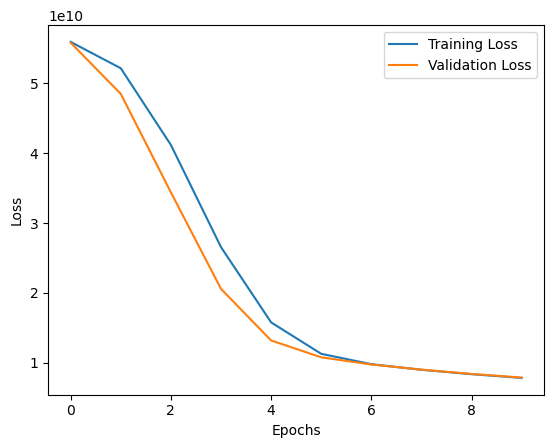

In [106]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Evaluate the model

In [114]:
ann_predictions = ann_model.predict(X_test)
ann_mae = mean_absolute_error(y_test, ann_predictions)
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_rmse = np.sqrt(ann_mse)
ann_r2 = r2_score(y_test, ann_predictions)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [118]:
print(f'ANN MAE: {ann_mae:.2f}, MSE: {ann_mse:.2f}, RMSE: {ann_rmse:.2f}, R2: {ann_r2:.2f}')

ANN MAE: 64122.96, MSE: 7723044163.97, RMSE: 87880.85, R2: 0.41


### 1D Convolutional Model

#### Reshape input data for Conv1D

In [125]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#### Define the 1D Convolutional model

In [137]:
conv_model = models.Sequential([
    layers.Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, 2, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

#### Compile the model

In [138]:
conv_model.compile(optimizer='adam', loss='mse')

#### Train the model

In [140]:
conv_history = conv_model.fit(X_train_reshaped, y_train, epochs=10, validation_split=0.2, verbose=0)

#### Plot the error curves

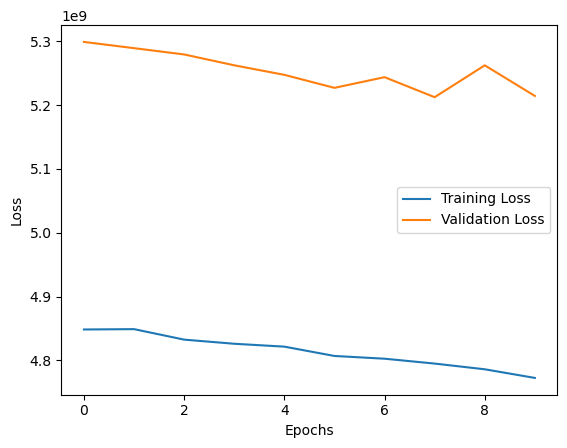

In [147]:
plt.plot(conv_history.history['loss'], label='Training Loss')
plt.plot(conv_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Evaluate the model

In [157]:
conv_predictions = conv_model.predict(X_test_reshaped)
conv_mae = mean_absolute_error(y_test, conv_predictions)
conv_mse = mean_squared_error(y_test, conv_predictions)
conv_rmse = np.sqrt(conv_mse)
conv_r2 = r2_score(y_test, conv_predictions)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [160]:
print(f'Conv1D MAE: {conv_mae:.2f}, MSE: {conv_mse:.2f}, RMSE: {conv_rmse:.2f}, R2: {conv_r2:.2f}')

Conv1D MAE: 51867.55, MSE: 4931041892.52, RMSE: 70221.38, R2: 0.62


### No of GUP's available

In [161]:
print("Num GPU's available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPU's available:  0
